In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('libraries')

libraries


In [2]:
df=pd.read_csv(r'C:\Users\Meghana c\Downloads\sales_dirtydata.csv')
df

,Order_ID,Customer_Name,City,Age,Product,Quantity,Price,Order_Date
0,4349,NaN,Hyderabad,NaN,NaN,2.0,15000.0,01-04-2022
1,2037,Kiran,Bengaluru,35.0,Tablet,2.0,-5000.0,15-08-2024
2,6110,NaN,bengaluru,45.0,Camera,3.0,30000.0,06-04-2022
3,9458,Sneha,NaN,30.0,Mobile,3.0,15000.0,22-11-2022
4,4082,Arjun,Mumbai,NaN,Camera,2.0,15000.0,32-13-2022
...,...,...,...,...,...,...,...,...
10195,6167,Kiran,Delhi,40.0,Tablet,3.0,10000.0,01-02-2023
10196,7117,Anita,Bengaluru,25.0,NaN,NaN,20000.0,14-04-2023
10197,8351,Kiran,Hyderabad,-5.0,NaN,1.0,15000.0,25-06-2022
10198,6951,Kiran,bengaluru,NaN,NaN,NaN,30000.0,24-01-2024


In [6]:
df.describe()

,Order_ID,Age,Quantity,Price
count,10200.000000,8980.000000,8556.000000,8466.000000
mean,5459.901569,52.407572,2.033076,13785.731160
std,2589.371235,61.338867,2.015882,11539.077223
min,1001.000000,-5.000000,-1.000000,-5000.000000
25%,3207.750000,25.000000,1.000000,10000.000000
50%,5477.500000,35.000000,2.000000,15000.000000
75%,7694.000000,45.000000,3.000000,20000.000000
max,9998.000000,200.000000,5.000000,30000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       10200 non-null  int64  
 1   Customer_Name  8884 non-null   object 
 2   City           8898 non-null   object 
 3   Age            8980 non-null   float64
 4   Product        8438 non-null   object 
 5   Quantity       8556 non-null   float64
 6   Price          8466 non-null   float64
 7   Order_Date     10200 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 637.6+ KB


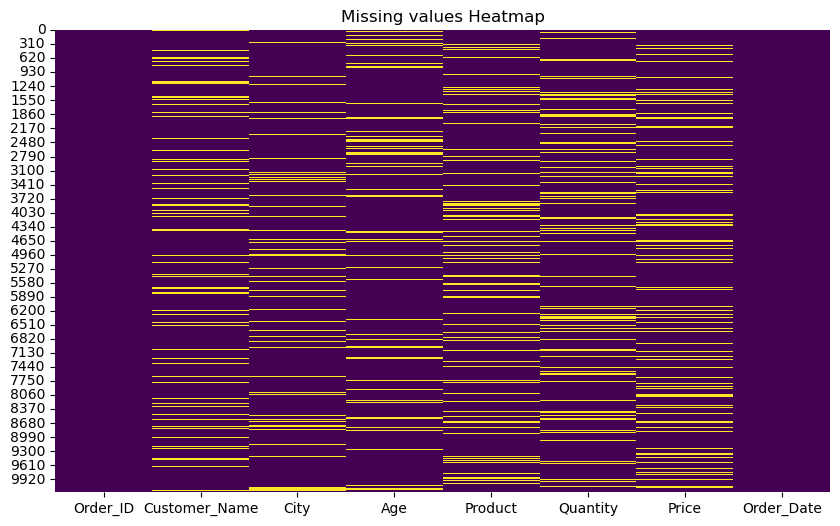

In [4]:
#vizualize missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing values Heatmap')
plt.show()

In [5]:
#check count
df.isnull().sum()

Order_ID            0
Customer_Name    1316
City             1302
Age              1220
Product          1762
Quantity         1644
Price            1734
Order_Date          0
dtype: int64

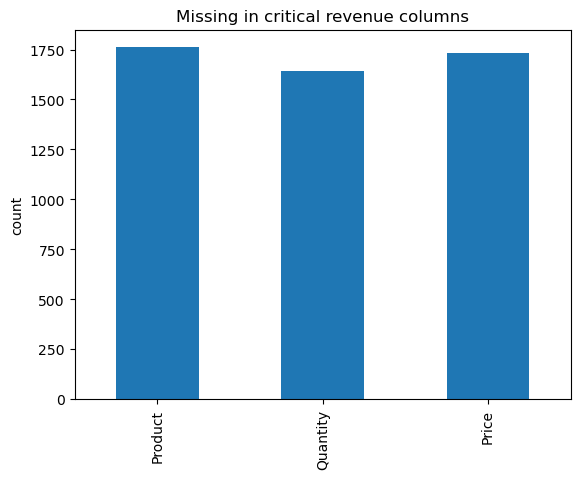

In [8]:
#visualize critical columns(Revenue columns)=product,quantity,price
df[['Product','Quantity','Price']].isnull().sum().plot(kind='bar')
plt.title('Missing in critical revenue columns')
plt.ylabel('count')
plt.show()

In [9]:
#has missing value so drop
df=df.dropna(subset=['Product','Quantity','Price'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5865 entries, 1 to 10195
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       5865 non-null   int64  
 1   Customer_Name  5112 non-null   object 
 2   City           5122 non-null   object 
 3   Age            5169 non-null   float64
 4   Product        5865 non-null   object 
 5   Quantity       5865 non-null   float64
 6   Price          5865 non-null   float64
 7   Order_Date     5865 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 412.4+ KB


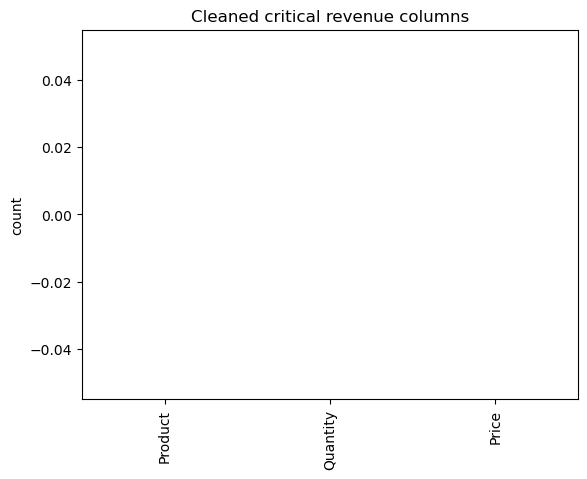

In [12]:
df[['Product','Quantity','Price']].isnull().sum().plot(kind='bar')
plt.title('Cleaned critical revenue columns')
plt.ylabel('count')
plt.show()

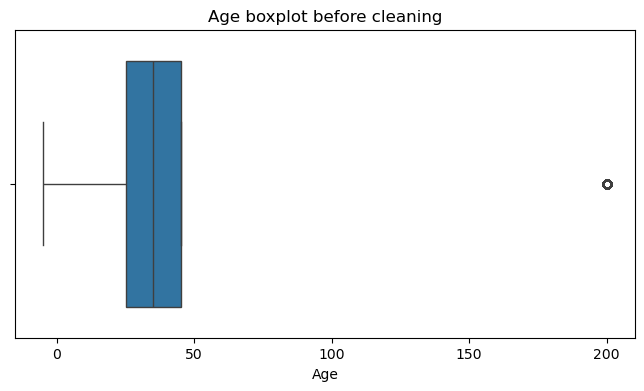

In [13]:
#vizualize age distribution(outliers)
#age vizualize
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Age'])
plt.title('Age boxplot before cleaning')
plt.show()

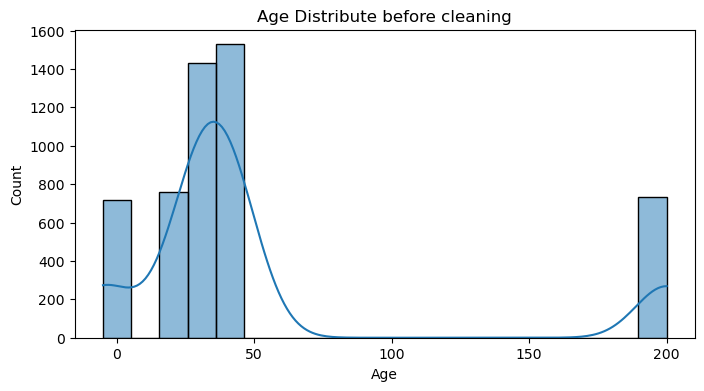

In [15]:
#vizualize age histogram
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribute before cleaning')
plt.show()

In [16]:
# clean age
df=df[(df['Age'].isnull()) | ((df['Age']>=18) & (df['Age']<=100))]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4415 entries, 1 to 10195
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       4415 non-null   int64  
 1   Customer_Name  3848 non-null   object 
 2   City           3858 non-null   object 
 3   Age            3719 non-null   float64
 4   Product        4415 non-null   object 
 5   Quantity       4415 non-null   float64
 6   Price          4415 non-null   float64
 7   Order_Date     4415 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 310.4+ KB


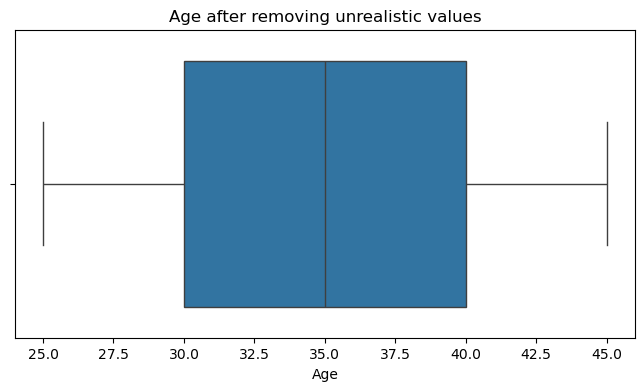

In [18]:
# vizualize age after removing garbage
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Age'])
plt.title('Age after removing unrealistic values')
plt.show()

In [19]:
#fill missing age
df['Age'].isnull().sum()

np.int64(696)

In [20]:
df['Age']=df['Age'].fillna(df['Age'].median())

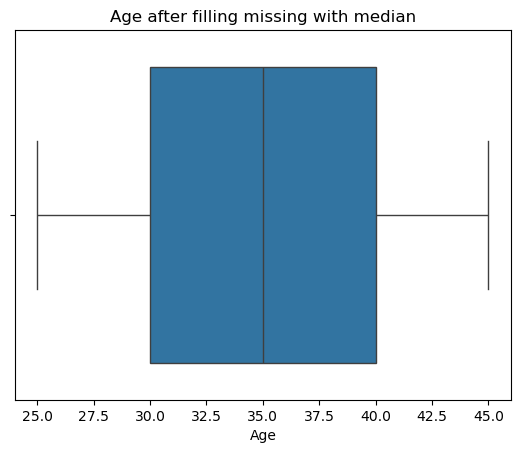

In [21]:
#age after filling missing value
sns.boxplot(x=df['Age'])
plt.title('Age after filling missing with median')
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4415 entries, 1 to 10195
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       4415 non-null   int64  
 1   Customer_Name  3848 non-null   object 
 2   City           3858 non-null   object 
 3   Age            4415 non-null   float64
 4   Product        4415 non-null   object 
 5   Quantity       4415 non-null   float64
 6   Price          4415 non-null   float64
 7   Order_Date     4415 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 310.4+ KB


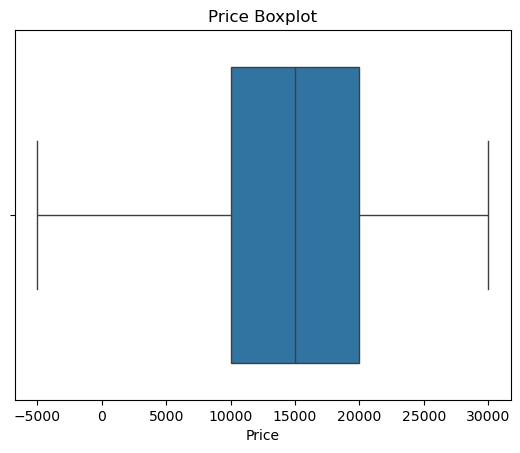

In [23]:
#vizualize price and quantity
# Price boxplot
sns.boxplot(x=df['Price'])
plt.title('Price Boxplot')
plt.show()

In [24]:
# negative value exit remove
df=df[df['Price']>=0]

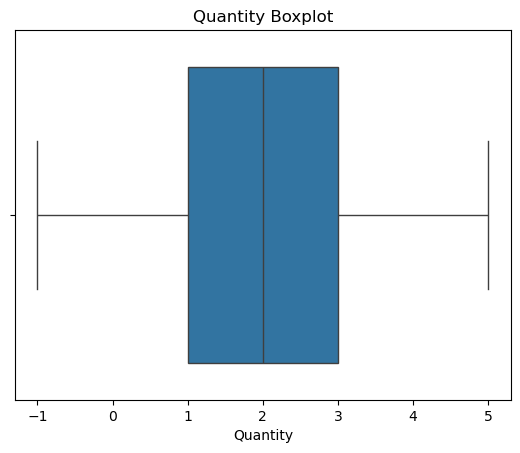

In [25]:
#Quntity boxplot
sns.boxplot(x=df['Quantity'])
plt.title('Quantity Boxplot')
plt.show()

In [26]:
df=df[df['Quantity']>=0]

In [27]:
#visualize dates
#convert
df['Order_Date']=pd.to_datetime(df['Order_Date'], dayfirst=True, errors='coerce')

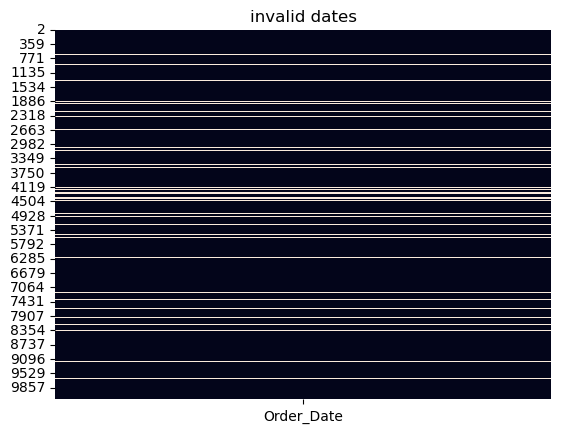

In [28]:
#check missing visually
sns.heatmap(df[['Order_Date']].isnull(), cbar=False)
plt.title('invalid dates')
plt.show()

In [29]:
df=df.dropna(subset=['Order_Date'])

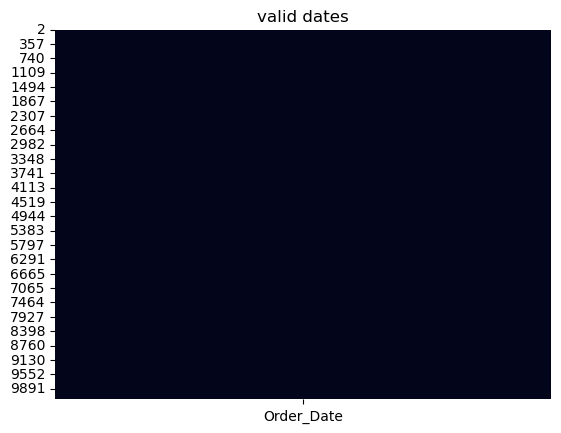

In [31]:
sns.heatmap(df[['Order_Date']].isnull(), cbar=False)
plt.title('valid dates')
plt.show()

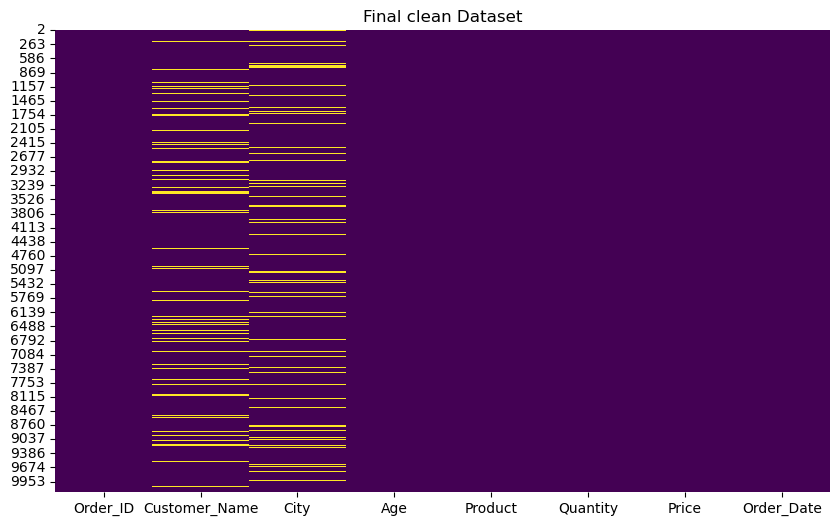

In [33]:
# final visual confirmation
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Final clean Dataset')
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2522 entries, 2 to 10195
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       2522 non-null   int64         
 1   Customer_Name  2221 non-null   object        
 2   City           2222 non-null   object        
 3   Age            2522 non-null   float64       
 4   Product        2522 non-null   object        
 5   Quantity       2522 non-null   float64       
 6   Price          2522 non-null   float64       
 7   Order_Date     2522 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 177.3+ KB


In [36]:
df['City']=df['City'].fillna(df['City'].mode()[0])

In [37]:
df['Customer_Name']=df['Customer_Name'].fillna('Unknown')

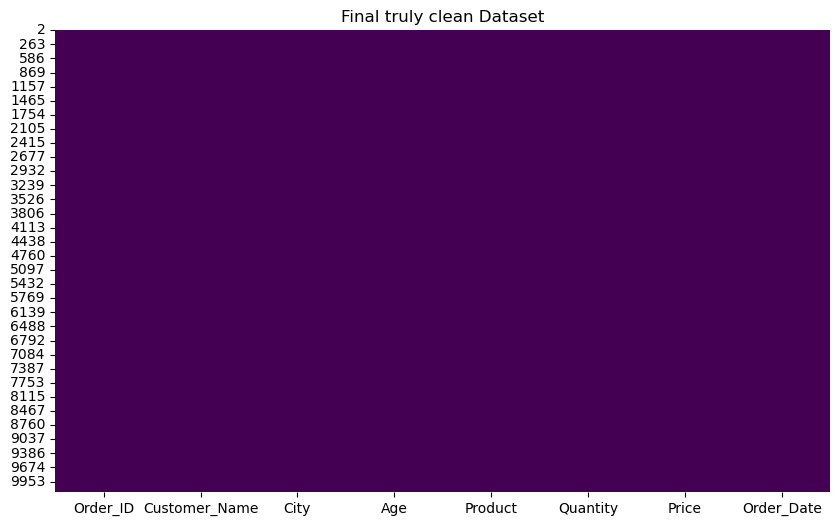

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Final truly clean Dataset')
plt.show()

In [40]:
df.isnull().sum()

Order_ID         0
Customer_Name    0
City             0
Age              0
Product          0
Quantity         0
Price            0
Order_Date       0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2522 entries, 2 to 10195
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       2522 non-null   int64         
 1   Customer_Name  2522 non-null   object        
 2   City           2522 non-null   object        
 3   Age            2522 non-null   float64       
 4   Product        2522 non-null   object        
 5   Quantity       2522 non-null   float64       
 6   Price          2522 non-null   float64       
 7   Order_Date     2522 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 177.3+ KB


In [42]:
# index clean
df=df.reset_index(drop=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522 entries, 0 to 2521
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       2522 non-null   int64         
 1   Customer_Name  2522 non-null   object        
 2   City           2522 non-null   object        
 3   Age            2522 non-null   float64       
 4   Product        2522 non-null   object        
 5   Quantity       2522 non-null   float64       
 6   Price          2522 non-null   float64       
 7   Order_Date     2522 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 157.8+ KB


In [44]:
df['Age']=df['Age'].astype(int)
df['Quantity']=df['Quantity'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522 entries, 0 to 2521
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       2522 non-null   int64         
 1   Customer_Name  2522 non-null   object        
 2   City           2522 non-null   object        
 3   Age            2522 non-null   int64         
 4   Product        2522 non-null   object        
 5   Quantity       2522 non-null   int64         
 6   Price          2522 non-null   float64       
 7   Order_Date     2522 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 157.8+ KB


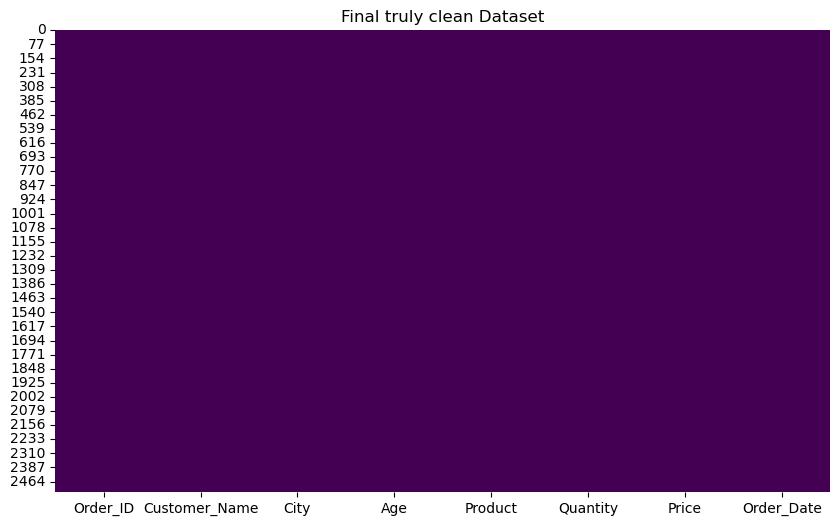

In [45]:
#final check
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Final truly clean Dataset')
plt.show()